# Exploratory Data Analysis

In [5]:
#importing the required Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [6]:
#importing the dataset and having a peek at the data
pharm = pd.read_excel('Case Study Data scientist Challenge_dataset_Persistent_Non_Persistent (1).xlsx', sheet_name = 'Dataset')
pharm.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [7]:
#dimensions of the data
print(pharm.shape)
pharm.describe()

(3424, 69)


,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [8]:
#checking the no and frequency of the categorical data
print(pharm['Race'].value_counts())

Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64


In [9]:
pharm['Ethnicity'].value_counts()

Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64

In [10]:
pharm['Region'].value_counts()

Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64

In [11]:
pharm['Ntm_Speciality'].value_counts().head(10)

GENERAL PRACTITIONER         1535
RHEUMATOLOGY                  604
ENDOCRINOLOGY                 458
Unknown                       310
ONCOLOGY                      225
OBSTETRICS AND GYNECOLOGY      90
UROLOGY                        33
ORTHOPEDIC SURGERY             30
CARDIOLOGY                     22
PATHOLOGY                      16
Name: Ntm_Speciality, dtype: int64

In [12]:
pharm['Ntm_Specialist_Flag'].value_counts()

Others        2013
Specialist    1411
Name: Ntm_Specialist_Flag, dtype: int64

In [16]:
pharm['Ntm_Speciality_Bucket'].value_counts()

OB/GYN/Others/PCP/Unknown    2104
Endo/Onc/Uro                  716
Rheum                         604
Name: Ntm_Speciality_Bucket, dtype: int64

In [17]:
pharm['Age_Bucket'].value_counts()

>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64

# Data Cleaning and Data Preparation

In [13]:
#since the data contains Unknown values, hence replacing them with NaN for Python to understand
pharm.replace('Unknown', np.nan, inplace = True)

In [14]:
pharm.isnull().head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


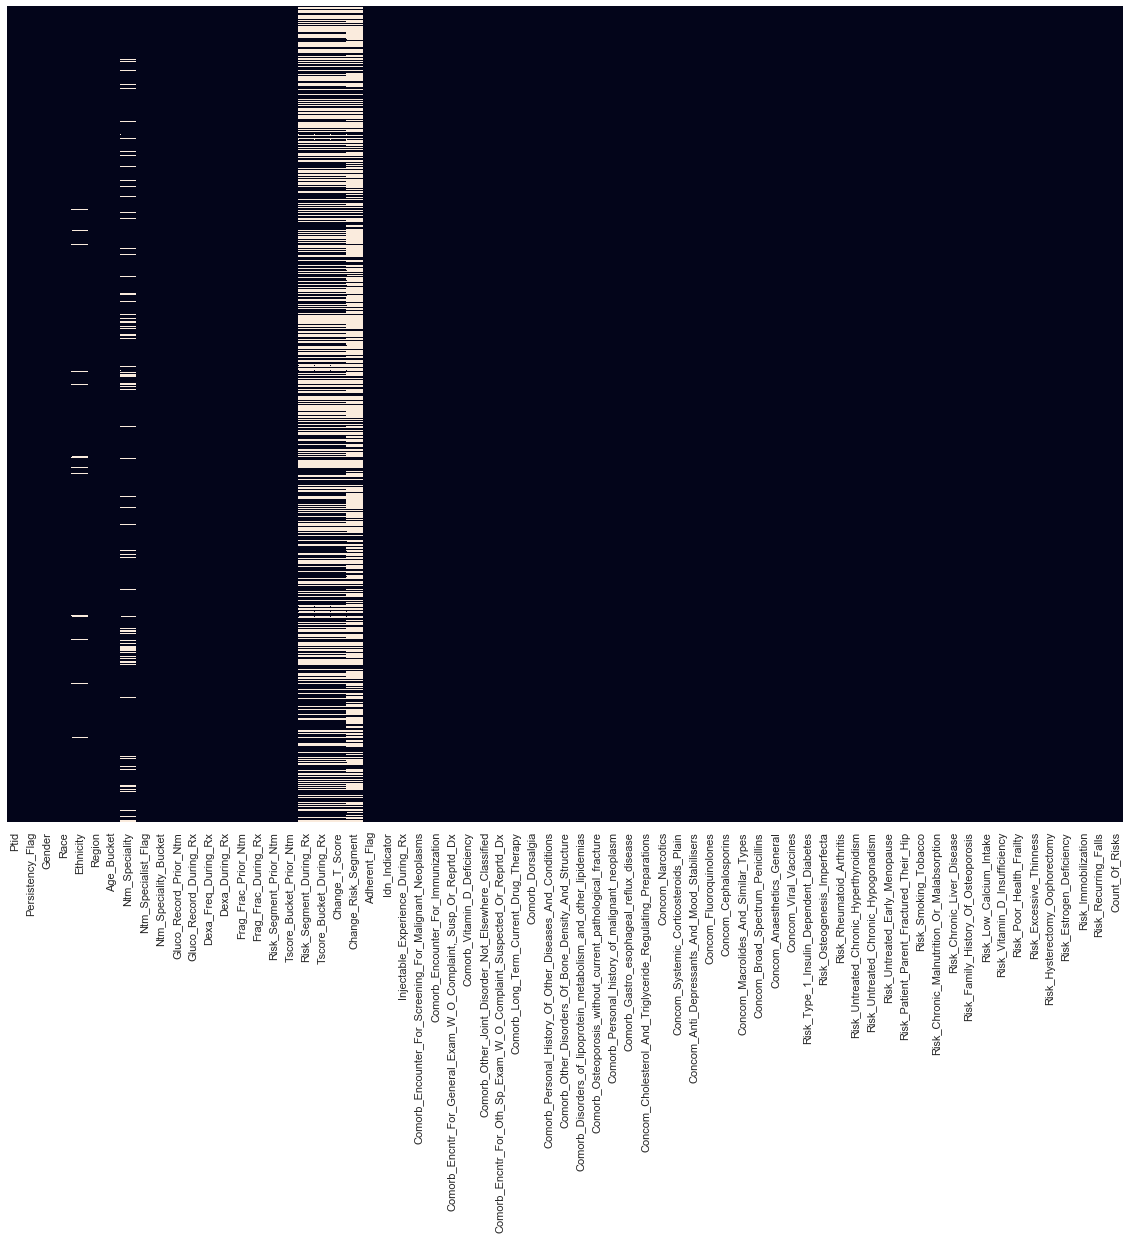

In [72]:
#visualizing which all columns contain unknown/missing values
plt.figure(figsize = (20,15))
sns.heatmap(pharm.isnull(),yticklabels = False, cbar = False)

In [25]:
#we can clearly see that columns 'Ethnicity', 'Ntm_Speciality', 'Risk_Segment_During_Rx','Tscore_Bucket_During_Rx', 
#'Change_T_Score' and 'Change_RIsk_Segment' contain missing values

In [15]:
#column 'Ptid' has no such significance in predicting and analysing the data, hence dropping the column
pharm.drop(columns = 'Ptid',inplace = True)

In [16]:
#checking the no of null values in column
pharm['Ethnicity'].isna().value_counts()

False    3333
True       91
Name: Ethnicity, dtype: int64

In [17]:
pharm['Ethnicity'].value_counts()

Not Hispanic    3235
Hispanic          98
Name: Ethnicity, dtype: int64

In [18]:
#since the no of Not Hispanic entries way too large as compared to Hispanic, we can replace the missing values 
#by the mode of the column i.e. Not Hispanic
pharm['Ethnicity'].fillna('Not Hispanic', inplace = True)

In [19]:
pharm['Ntm_Speciality'].isnull().value_counts()

False    3114
True      310
Name: Ntm_Speciality, dtype: int64

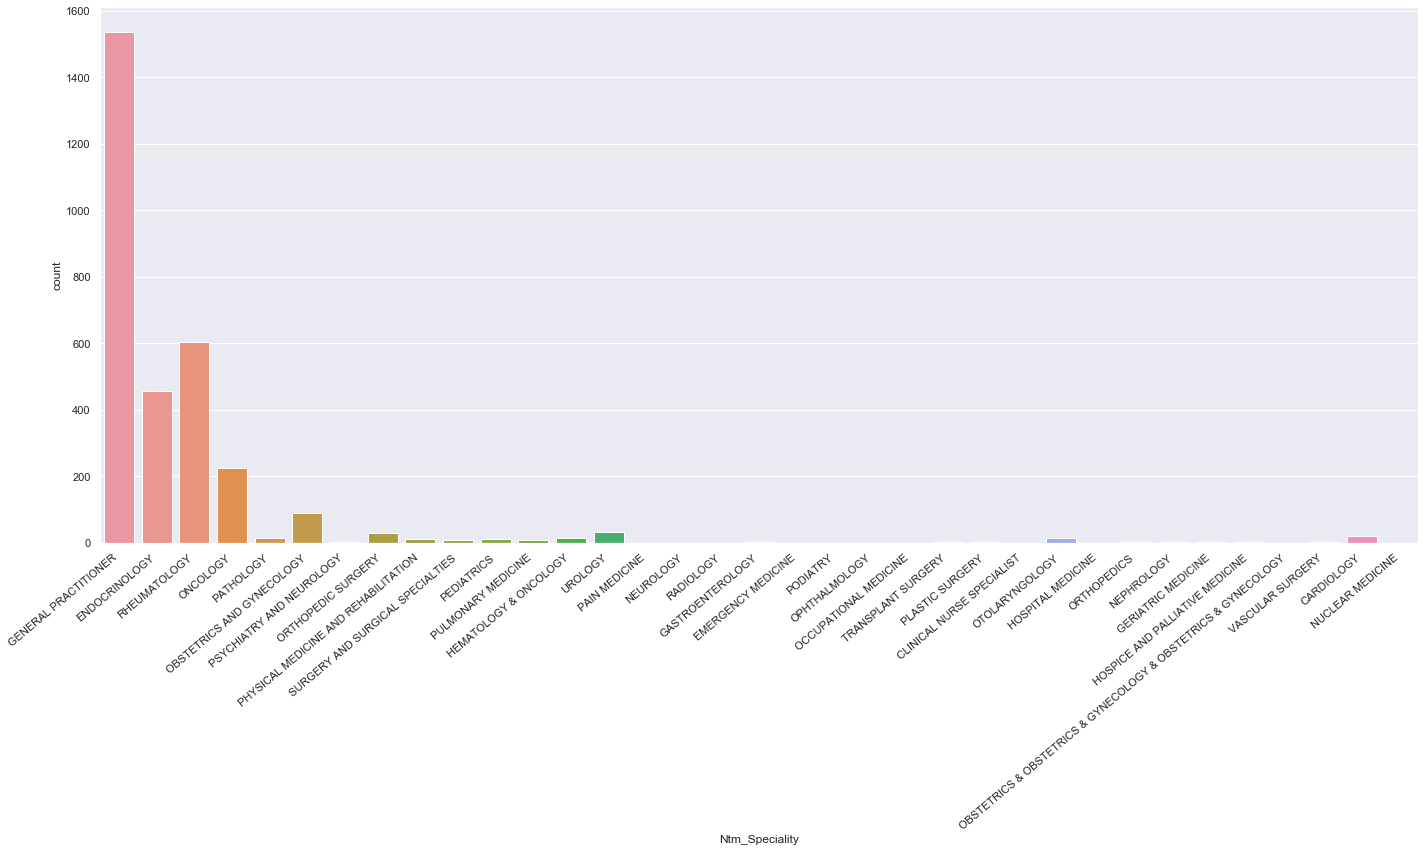

In [54]:
#checking the frequency of each category in Ntm_Speciality column
plt.figure(figsize = (20,12))
ax = sns.countplot(x = 'Ntm_Speciality', data = pharm)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [55]:
#General Practitioner has the maximum no of occurences and as compared to other categories in the column as seen in the graph, 
#we can replace the unknown values by the mode of the column i.e. General Practitioner

In [20]:
pharm['Ntm_Speciality'].fillna('GENERAL PRACTITIONER', inplace = True)

In [21]:
#checking the count of missing values in all the 4 columns
pharm[pharm['Risk_Segment_During_Rx'].isnull() & pharm['Tscore_Bucket_During_Rx'].isnull() & 
      pharm['Change_T_Score'].isnull() & pharm['Change_Risk_Segment'].isnull()].shape[0]

1497

In [22]:
print(pharm[pharm['Risk_Segment_During_Rx'].isnull()].shape[0])
print(pharm[pharm['Tscore_Bucket_During_Rx'].isnull()].shape[0])
print(pharm[pharm['Change_T_Score'].isnull()].shape[0])
print(pharm[pharm['Change_Risk_Segment'].isnull()].shape[0])

1497
1497
1497
2229


C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


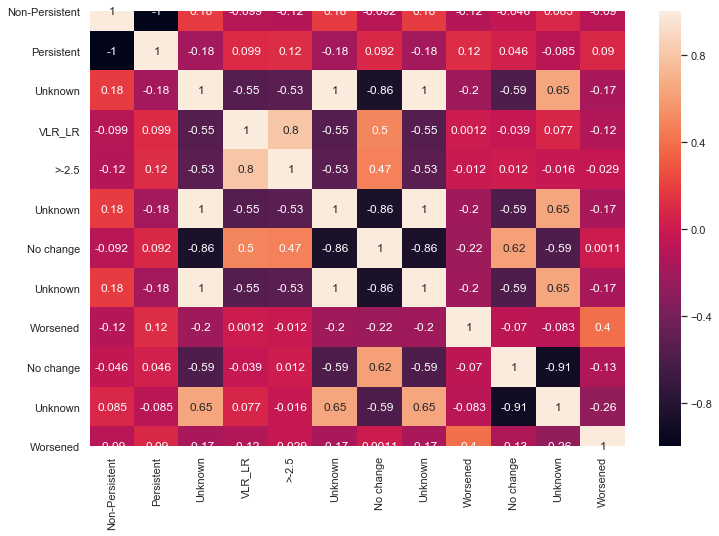

In [23]:
#now lets check the correlation of each of these 4 columns with the target variable
df1_temp = pharm[['Persistency_Flag', 'Risk_Segment_During_Rx','Tscore_Bucket_During_Rx','Change_T_Score','Change_Risk_Segment']]
df1_temp.replace(np.nan, 'Unknown', inplace = True)

d1 = pd.get_dummies(df1_temp['Persistency_Flag'])
d2 = pd.get_dummies(df1_temp['Risk_Segment_During_Rx'], drop_first = True)
d3 = pd.get_dummies(df1_temp['Tscore_Bucket_During_Rx'], drop_first = True)
d4 = pd.get_dummies(df1_temp['Change_T_Score'], drop_first = True)
d5 = pd.get_dummies(df1_temp['Change_Risk_Segment'], drop_first = True)

df1_temp = pd.concat([df1_temp,d1,d2,d3,d4,d5], axis = 1)
df1_temp.drop(['Persistency_Flag','Risk_Segment_During_Rx','Tscore_Bucket_During_Rx','Change_T_Score','Change_Risk_Segment'],
            axis = 1, inplace = True)

plt.figure(figsize = (12,8))
sns.heatmap(df1_temp.corr(), annot = True)

In [ ]:
#there is almost 45% of data missing in the columns Risk_Segment_During_Rx, Tscore_Bucket_During_Rx, Change_T_Score 
#and 65% missing values in column Change_Risk_Segment, hence its better to drop these columns from the dataset
#also, there is no or very less correaltion of these categories with the target variable, 
#hence we can go ahead and drop these 4 columns from our dataset

In [24]:
pharm.drop(['Risk_Segment_During_Rx','Tscore_Bucket_During_Rx','Change_T_Score','Change_Risk_Segment'], axis = 1, inplace = True)

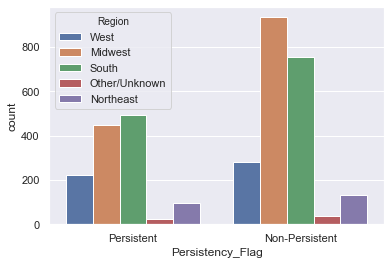

In [25]:
sns.countplot(x = 'Persistency_Flag', data = pharm, hue = 'Region')

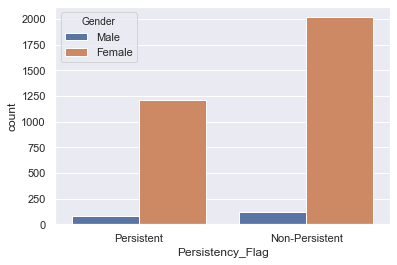

In [26]:
sns.countplot(x = 'Persistency_Flag', data = pharm, hue = 'Gender')

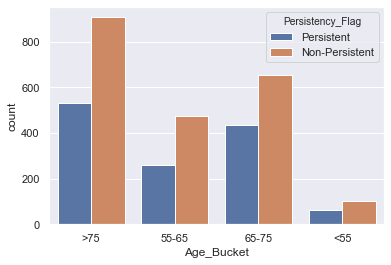

In [27]:
sns.countplot(x = 'Age_Bucket', data = pharm, hue = 'Persistency_Flag')

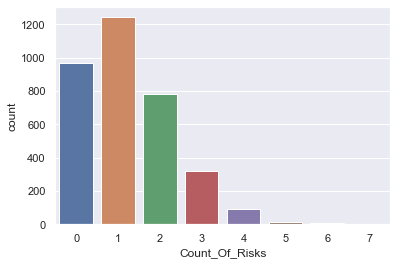

In [28]:
sns.countplot(x = 'Count_Of_Risks', data = pharm)

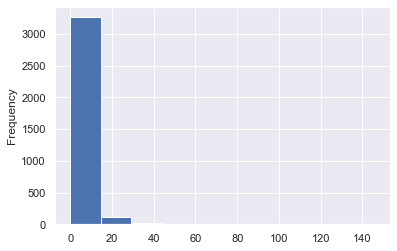

In [29]:
pharm['Dexa_Freq_During_Rx'].plot(kind = 'hist', bins = 10)

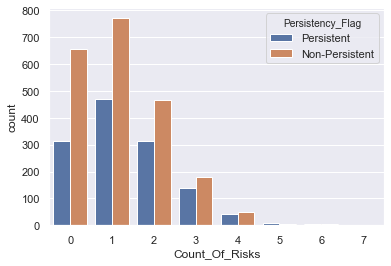

In [30]:
sns.countplot(x = 'Count_Of_Risks', data = pharm, hue = 'Persistency_Flag')

In [139]:
#. Dropping the columns Ntm_SPeciality and Ntm_Speciality_Bucket are highly correlated with each other,
#hence we can drop any one of these columnNtm_Speciality column would be more efficient 
#as the no of categories is very large as compared to that in Ntm_SPeciality_Bucket

In [31]:
pharm.drop('Ntm_Speciality', axis = 1, inplace = True)

In [32]:
pharm

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,Others,OB/GYN/Others/PCP/Unknown,N,Y,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,Others,OB/GYN/Others/PCP/Unknown,Y,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,N,Y,N,N,N,N,N,N,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,N,N,N,N,N,N,N,N,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Specialist,Endo/Onc/Uro,N,N,...,N,N,Y,N,N,N,N,N,N,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,N,N,N,N,N,N,N,N,0


In [142]:
#now the data contains all the categorical columns except 2 i.e. Dexa_Freq_During_Rx and Count_Of_Risks. We need to convert 
#all the categorical data into form of numbers so that the machine learning algorithms can read and predict the data

In [156]:
#columns Race and Region contain 97 and 60 values respectively that are Other/Unknown. 
#Since the number/frequency of such data values is very less as comapred to the total rows in dataset, 
#we want to get it replaced by other value so that while converting these categorical columns in form of 0 and 1 
#we would not be needing to create another extar columns for Other/Unknown category

In [151]:
pharm[pharm['Race'] == 'Other/Unknown']['Ethnicity'].value_counts()

Not Hispanic    63
Hispanic        34
Name: Ethnicity, dtype: int64

In [147]:
pharm[pharm['Region'] == 'Other/Unknown']['Ethnicity'].value_counts()

Not Hispanic    59
Hispanic         1
Name: Ethnicity, dtype: int64

In [155]:
pharm[pharm['Ethnicity'] == 'Not Hispanic']['Race'].value_counts()

Caucasian           3088
African American      92
Asian                 83
Other/Unknown         63
Name: Race, dtype: int64

In [157]:
pharm[pharm['Ethnicity'] == 'Not Hispanic']['Region'].value_counts()

Midwest          1372
South            1197
West              474
Northeast         224
Other/Unknown      59
Name: Region, dtype: int64

In [162]:
pharm[pharm['Ethnicity'] == 'Hispanic']['Race'].value_counts()

Caucasian           94
African American     3
Asian                1
Name: Race, dtype: int64

In [158]:
#we see that we can replace Other/Unknown values in Race column by Caucasian and Midwest in Region column

In [33]:
pharm['Race'].replace('Other/Unknown', 'Caucasian', inplace = True)

In [34]:
pharm['Region'].replace('Other/Unknown', 'Midwest', inplace = True)

In [35]:
pharm['Region'].value_counts()

Midwest      1443
South        1247
West          502
Northeast     232
Name: Region, dtype: int64

In [36]:
pharm['Race'].value_counts()

Caucasian           3245
African American      95
Asian                 84
Name: Race, dtype: int64

In [37]:
pharm

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Caucasian,Hispanic,Midwest,65-75,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,Others,OB/GYN/Others/PCP/Unknown,N,Y,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,Others,OB/GYN/Others/PCP/Unknown,Y,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,N,Y,N,N,N,N,N,N,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,N,N,N,N,N,N,N,N,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Specialist,Endo/Onc/Uro,N,N,...,N,N,Y,N,N,N,N,N,N,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,N,N,N,N,N,N,N,N,0


In [38]:
d1 = pd.get_dummies(pharm['Gender'], drop_first = True)
d2 = pd.get_dummies(pharm['Race'], drop_first = True)
d3 = pd.get_dummies(pharm['Ethnicity'], drop_first = True)
d4 = pd.get_dummies(pharm['Region'], drop_first = True)
d5 = pd.get_dummies(pharm['Age_Bucket'], drop_first = True)
d6 = pd.get_dummies(pharm['Ntm_Specialist_Flag'], drop_first = True)
d7 = pd.get_dummies(pharm['Ntm_Speciality_Bucket'], drop_first = True)
d8 = pd.get_dummies(pharm['Risk_Segment_Prior_Ntm'], drop_first = True)
d9 = pd.get_dummies(pharm['Tscore_Bucket_Prior_Ntm'], drop_first = True)
d10 = pd.get_dummies(pharm['Adherent_Flag'], drop_first = True)
d11 = pd.get_dummies(pharm['Persistency_Flag'], drop_first = True)

In [39]:
pharm = pd.concat([pharm,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11], axis = 1)

pharm.drop(['Gender','Race','Ethnicity','Region','Age_Bucket','Ntm_Specialist_Flag','Ntm_Speciality_Bucket',
             'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Adherent_Flag', 'Persistency_Flag'], axis = 1, inplace = True)

In [40]:
pharm

,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,...,65-75,<55,>75,Specialist,OB/GYN/Others/PCP/Unknown,Rheum,VLR_LR,>-2.5,Non-Adherent,Persistent
0,N,N,0,N,N,N,N,Y,N,Y,...,0,0,1,0,1,0,1,1,0,1
1,N,N,0,N,N,N,N,Y,N,N,...,0,0,0,0,1,0,1,1,0,0
2,N,N,0,N,N,N,N,Y,Y,N,...,1,0,0,0,1,0,0,0,0,0
3,N,Y,0,N,N,N,N,Y,N,Y,...,0,0,1,0,1,0,0,1,0,0
4,Y,Y,0,N,N,N,N,Y,Y,Y,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,N,N,0,N,N,N,Y,Y,Y,N,...,0,0,1,0,1,0,1,1,0,1
3420,N,N,0,N,N,N,Y,Y,N,N,...,0,0,1,0,1,0,0,0,1,1
3421,N,N,7,Y,N,N,Y,Y,Y,N,...,0,0,1,1,0,0,1,1,0,1
3422,N,N,0,N,N,Y,Y,Y,Y,N,...,0,0,0,0,1,0,1,1,0,0


In [ ]:
#rest of the categorical columns are all Y and N,we can simply replace them by 1 and 0 respectively, 
#preventing us to create new columns as we did in the above step

In [41]:
pharm.replace(('Y', 'N'), (1,0), inplace = True)

In [175]:
pharm.to_excel('Pharmaceutical Data Solution - Final Data1.xlsx')

In [42]:
pharm

,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,...,65-75,<55,>75,Specialist,OB/GYN/Others/PCP/Unknown,Rheum,VLR_LR,>-2.5,Non-Adherent,Persistent
0,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,1,1,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,1,0,0
2,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
4,1,1,0,0,0,0,0,1,1,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,0,0,0,0,0,0,1,1,1,0,...,0,0,1,0,1,0,1,1,0,1
3420,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,1
3421,0,0,7,1,0,0,1,1,1,0,...,0,0,1,1,0,0,1,1,0,1
3422,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,1,0,1,1,0,0


# Machine Learning - Classification

In [43]:
#importing all the required libraries required for model prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
#input variables used for model prediction
X = pharm.drop('Persistent', axis = 1)

In [45]:
#this is our target variable
y = pharm['Persistent']

In [46]:
#splitting the data into tarin and test data ( 70% training data and 30% testing data)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [62]:
#Logistic Regression
log = LogisticRegression()
log.fit(X_train, Y_train)
result = log.score(X_test, Y_test)
predicted = log.predict(X_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

Accuracy: 81.075%
[[482  60]
 [102 212]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       542
           1       0.78      0.68      0.72       314

    accuracy                           0.81       856
   macro avg       0.80      0.78      0.79       856
weighted avg       0.81      0.81      0.81       856



C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
#Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
result = lda.score(X_test, Y_test)
predicted = lda.predict(X_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

Accuracy: 82.009%
[[493  49]
 [105 209]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       542
           1       0.81      0.67      0.73       314

    accuracy                           0.82       856
   macro avg       0.82      0.79      0.80       856
weighted avg       0.82      0.82      0.82       856



C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [60]:
#Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
result = dtc.score(X_test, Y_test)
predicted = dtc.predict(X_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

Accuracy: 71.495%
[[409 133]
 [111 203]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       542
           1       0.60      0.65      0.62       314

    accuracy                           0.71       856
   macro avg       0.70      0.70      0.70       856
weighted avg       0.72      0.71      0.72       856



In [59]:
#Random Forest
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, Y_train)
result = rfc.score(X_test, Y_test)
rfc_pred = rfc.predict(X_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, rfc_pred))
print(classification_report(Y_test, rfc_pred))

Accuracy: 81.425%
[[483  59]
 [100 214]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       542
           1       0.78      0.68      0.73       314

    accuracy                           0.81       856
   macro avg       0.81      0.79      0.79       856
weighted avg       0.81      0.81      0.81       856



In [361]:
#K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, Y_train)
result = knn.score(X_test, Y_test)
predicted = knn.predict(X_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

Accuracy: 80.491%
[[505  37]
 [130 184]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       542
           1       0.83      0.59      0.69       314

    accuracy                           0.80       856
   macro avg       0.81      0.76      0.77       856
weighted avg       0.81      0.80      0.80       856



In [362]:
#checking and using the best k-value for the model
param_grid = {'n_neighbors' : [i for i in range(1,29,2)]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 3)
grid.fit(X_train, Y_train)

C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.737, total=   0.2s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... n_neighbors=1, score=0.737, total=   0.2s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ....................... n_neighbors=1, score=0.717, total=   0.2s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.786, total=   0.3s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.784, total=   0.3s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.755, total=   0.2s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.786, total=   0.2s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.791, total=   0.3s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.771, total=   0.3s
[CV] n_neighbors=7 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   11.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [363]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(Y_test, grid_predictions))

{'n_neighbors': 19}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       542
           1       0.82      0.60      0.69       314

    accuracy                           0.80       856
   macro avg       0.81      0.76      0.77       856
weighted avg       0.81      0.80      0.80       856



In [364]:
#Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
result = svc.score(X_test, Y_test)
predicted = svc.predict(X_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 80.491%
[[490  52]
 [115 199]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       542
           1       0.79      0.63      0.70       314

    accuracy                           0.80       856
   macro avg       0.80      0.77      0.78       856
weighted avg       0.80      0.80      0.80       856



In [365]:
#checking the best and optimal values for C and gamma
param_grid = {'C' : [0.1,1,10,100,1000], 'gamma' : [1,0.1,0.01,0.001,0.0001]}
grid1 = GridSearchCV(SVC(), param_grid, verbose = 3)
grid1.fit(X_train, Y_train)

C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.620, total=   1.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.620, total=   1.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.620, total=   0.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.778, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.784, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.794, total=   0.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.778, total=   0.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.777, total=   0.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.785, total=   0.6s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ..................... C=1000, gamma=1, score=0.620, total=   1.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.619, total=   1.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.619, total=   1.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.784, total=   0.9s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.768, total=   0.8s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.778, total=   0.9s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.766, total=   1.6s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   55.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [367]:
print(grid1.best_params_)
print(grid1.best_estimator_)
grid1_predictions = grid1.predict(X_test)
print(classification_report(Y_test, grid1_predictions))

{'C': 1, 'gamma': 0.1}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       542
           1       0.78      0.68      0.73       314

    accuracy                           0.81       856
   macro avg       0.80      0.78      0.79       856
weighted avg       0.81      0.81      0.81       856



In [48]:
#Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
result = gnb.score(X_test, Y_test)
rfc_pred = gnb.predict(X_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, rfc_pred))
print(classification_report(Y_test, rfc_pred))

Accuracy: 71.612%
[[335 207]
 [ 36 278]]
              precision    recall  f1-score   support

           0       0.90      0.62      0.73       542
           1       0.57      0.89      0.70       314

    accuracy                           0.72       856
   macro avg       0.74      0.75      0.71       856
weighted avg       0.78      0.72      0.72       856



In [ ]:
#the best accuracy result is given by Linear Discriminant Analysis model with an accuracy of just above 82%.
#Also the recall and F1-score in predicting the Non-Persistent category is very high. Hence the model does well in 
#predicting the persistency of the drug

In [52]:
#checking the AUC value for Logistic Regression
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
scoring = 'roc_auc'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f - %.3f" % (results.mean(), results.std()))

C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GA336773\AppData\Local\Continuum\anaconda

AUC: 0.876 - 0.015


C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [ ]:
#we can see the AUC is relatively close to 1 and greater than 0.5, suggesting some skill in the predictions